Primeiro passo: importar o arquivo CSV com os 26.615 registros de imóveis.

In [ ]:
import pandas as pd
dataFrame = pd.read_csv("/content/kc_house_data.csv")
print("Quantidade de linhas importadas:", len(dataFrame))
print("Quantidade de colunas do Data Frame:", len(dataFrame.columns) )

Quantidade de linhas importadas: 21613
Quantidade de colunas do Data Frame: 21


Segundo passo: analisar o conteúdo importado.

In [ ]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Passo 3: vamos avaliar os tipos dos dados contidos no dataframe.

In [ ]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Passo 4: Vamos fazer uma análise de correlação das variáveis.

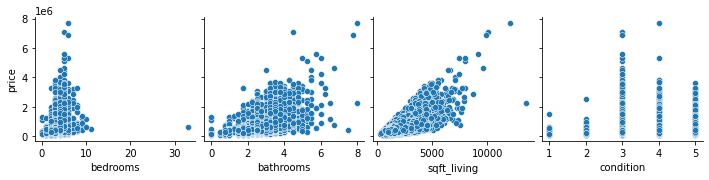

In [ ]:
import seaborn as sb
sb.pairplot(dataFrame,
            x_vars=["bedrooms","bathrooms","sqft_living", "condition"],
            y_vars=["price"])

Passo 5: Separar a variável independente da dependente.
Nesta primeira aplicação abordaremos regressão linear SIMPLES, logo, haverá apenas uma variável independente.

In [ ]:
#variável independente
X = dataFrame[["sqft_living"]]

#variável dependente
y = dataFrame[["price"]]

Passo 6: separar dados de teste e de treinamento

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
print("Quantidade de registros separados para treinamento:", len(X_train))
print("Quantidade de rgistros separados para teste", len(X_test))

Quantidade de registros separados para treinamento: 18371
Quantidade de rgistros separados para teste 3242


Passo 7: Vamos aplicar a regressão linear. A primeira coisa a fazer é importar a biblioteca de regressão e criar o objeto que fará a regressão.

In [ ]:
from sklearn.linear_model import LinearRegression
objRL = LinearRegression()


Passo 8: agora que temos um objeto apto a aplicar a Regressão Linear, vamos partir para o treinamento do modelo.

In [ ]:
objRL.fit(X_train,y_train)

LinearRegression()

Passo 9: vamos pedir para o objRL, que possui o gráfico e regressão gerado, prever o preço de casas com metragens que eu passar.

In [ ]:
#variável data armazenará metragens de imóveis
data = [
        [1180], #$221900.0
        [2575], #$538000.0
        [775], #$180000.0
        [450]
]

objRL.predict(data)




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[287385.08254873],
       [679464.13848798],
       [173555.67921152],
       [ 82211.09628661]])

Passo 10: a pergunta que não quer calar: cadê o gráfico? Vamos pedir para o Python mostrar como ficou o gráfico de regressão linear gerado.

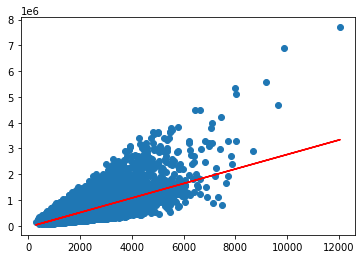

In [ ]:
y_pred = objRL.predict(X_train)

import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color="red")

Passo 11: vamos medir a acurácia do modelo. Na estatísitca, no caso de regressão linear, há dois indicadores muito utilizados o MSE e o R2.
O modelo deve atingir o menor MSE possível e o R2 deve ser o mais próximo de 1 possível. Estatísticos defendem que modelos com R2 acima de 0.7 são bons.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_test = objRL.predict(X_test)
print("MSE:", mean_squared_error(y_test,y_pred_test))
print("R2:", r2_score(y_test,y_pred_test))

MSE: 70109252413.03587
R2: 0.4942607450364658


Passo 12: Aprendemos acima como gerar um regressão linear simples. que utiliza apenas uma variável INDEPENDENTE para deduzir o valor da dependente.

Agora vamos tentar melhorar o modelo utilizando três variáveis independentes para prever o preço. No caso, vamos utilizar sqft_living,  bedrooms e bathrooms

In [ ]:
X2 = dataFrame[["sqft_living", "bathrooms", "bedrooms"]]
y2 = dataFrame[["price"]]
#X2
#y2

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


Passo 13: uma vez que separamos as variáveis independentes da dependente, vamos novamente evitar o overfitting, para isso iremos separar dados para treinamento e dados para teste.

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.15)
print("Quantidade de registros separados para treinamento:", len(X2_train))
print("Quantidade de registros separados para teste:", len(X2_test))

Quantidade de registros separados para treinamento: 18371
Quantidade de registros separados para teste: 3242


Passo 14: Uma vez que separamos os dados de treinamento e teste, vamos treinar modelo.

In [ ]:
from sklearn.linear_model import LinearRegression
objRL2 = LinearRegression()
objRL2.fit(X2_train, y2_train)

LinearRegression()

Passo 15: uma vez que um novo modelo foi gerado, vamos medir a acurácia dele.

In [ ]:
y2_pred_test = objRL2.predict(X2_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R2:", r2_score(y2_test,y2_pred_test))
print("MSE:", mean_squared_error(y2_test,y2_pred_test))

R2: 0.4850691427237587
MSE: 68277537358.14499


Recaptulando: primeiro, geramos um modelo com uma variável INDEPENDENTES (metragem); depois, geramos um modelo com três variáveis INDEPENDENTES (metragem, qtd. quartos, qtd. banheiros). Agora vamos gerar um modelo com o máximo de variáveis independentes possível.

In [ ]:
# Variáveis INDEPENDENTES
X3 = dataFrame.drop(columns=["id","date","price"])

#Variável DEPENDENTE
y3 = dataFrame[["price"]]

In [ ]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.10)
print("Quantidade de dados separados para treinamento:", len(X3_train))
print("Quantidade de dados separados para teste:", len(X3_test))

Quantidade de dados separados para treinamento: 19451
Quantidade de dados separados para teste: 2162


In [ ]:
from sklearn.linear_model import LinearRegression
objRL3 = LinearRegression()
objRL3.fit(X3_train, y3_train)

LinearRegression()

In [ ]:
y3_pred_test = objRL3.predict(X3_test)
print("R2:", r2_score(y3_test, y3_pred_test))
print("MSE:", mean_squared_error(y3_test, y3_pred_test))


R2: 0.6866640909902896
MSE: 44659705485.5266


Para ter uma noção de como está a performance do modelo, vamos gerar um gráfico que tornará intuitiva a comparação do valor previsto com o real.

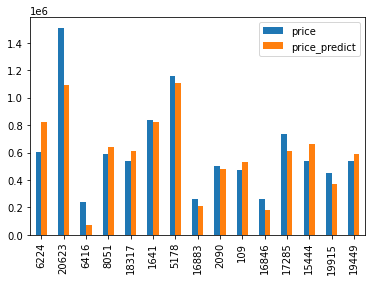

In [ ]:
y3_test["price_predict"] = y3_pred_test
dfAnalise = y3_test.head(15)
dfAnalise.plot(kind="bar")